# Oleaje CMEMS

Datos descargados de la pagina web: https://data.marine.copernicus.eu/product/WAVE_GLO_PHY_SWH_L4_NRT_014_003/description
    https://data.marine.copernicus.eu/product/WAVE_GLO_PHY_SWH_L4_NRT_014_003/download?dataset=cmems_obs-wave_glo_phy-swh_nrt_multi-l4-2deg_P1D

In [19]:
import os
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


In [11]:
dire = '/home/jovyan/shared/proyecto2/Oleaje/CMEMS/'

In [12]:
!ls /home/jovyan/shared/proyecto2/Oleaje/CMEMS/

cmems_obs-wave_glo_phy-swh_nrt_multi-l4-2deg_P1D_1677778805259.nc


# Explorando un unico fichero:

In [14]:
ds = xr.open_dataset(dire + 'cmems_obs-wave_glo_phy-swh_nrt_multi-l4-2deg_P1D_1677778805259.nc')

In [15]:
ds

<xarray.Dataset>
Dimensions:    (time: 366, latitude: 23, longitude: 28)
Coordinates:
  * latitude   (latitude) float32 -25.0 -23.0 -21.0 -19.0 ... 15.0 17.0 19.0
  * time       (time) datetime64[ns] 2021-03-01T12:00:00 ... 2022-03-01T12:00:00
  * longitude  (longitude) float32 -129.0 -127.0 -125.0 ... -79.0 -77.0 -75.0
Data variables:
    VAVH_INST  (time, latitude, longitude) float32 ...
Attributes: (12/37)
    Conventions:                                    CF-1.6
    FROM_ORIGINAL_FILE__Metadata_Conventions:       Unidata Dataset Discovery...
    cdm_data_type:                                  Grid
    comment:                                        Significant Wave Height m...
    contact:                                        servicedesk.cmems@mercato...
    creator_email:                                  servicedesk.cmems@mercato...
    ...                                             ...
    time_coverage_duration:                         P1D
    time_coverage_end:                              2023-03-01T12:00:00Z
    time_coverage_resolution:                       P1D
    time_coverage_start:                            2023-03-01T12:00:00Z
    title:                                          NRT merged all satellites...
    _CoordSysBuilder:                               ucar.nc2.dataset.conv.CF1...

De estas variables solo nos interesa lon, lat y ssh_model (los datos interpolados a la malla del satelite)

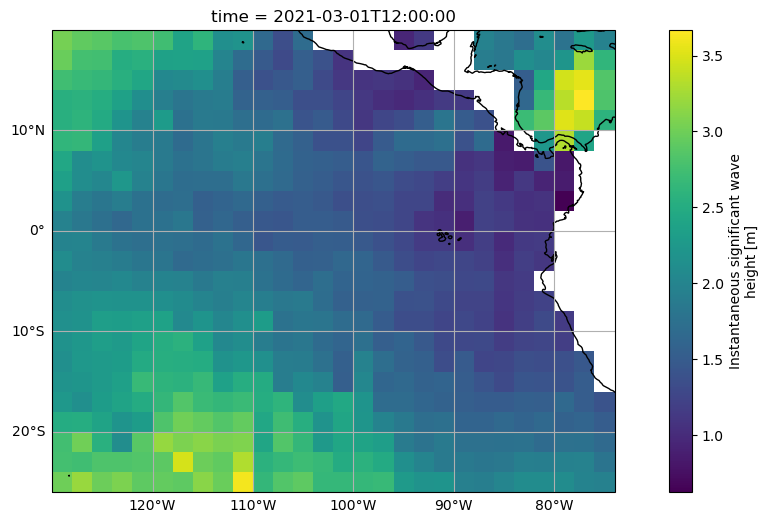

In [24]:
plt.figure(figsize=(14,6)) #(17,5)

ax1 = plt.subplot(111, projection=ccrs.PlateCarree())
ds.VAVH_INST[0,:,:].plot(ax=ax1)# air.plot.contourf(ax=ax)
ax1.coastlines()
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
